In [85]:
import pandas as pd # biblioteca para trabalhar com tabelas
import sklearn as sk # biblioteca quem contém ferramentas de aprendizado de máquina

from sklearn import preprocessing # módulo para transformação dos dados
from sklearn.model_selection      import train_test_split 

import numpy as np # biblioteca numérica
import matplotlib.pyplot as plt # biblioteca para plotar gráficos


### Carregando Dados Utilizando Pandas


In [5]:
suicidios = pd.read_csv("./master.csv") # Dados baixados do site Kagle. Suicídios.

### Visualizando os Dados 

In [77]:
suicidios


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Bulgaria,1996,male,15-24 years,95,626300,15.17,Bulgaria1996,NaN,"10,109,612,142",1270,Generation X
1,Colombia,2001,male,75+ years,54,304065,17.76,Colombia2001,NaN,"98,203,546,156",2662,Silent
2,Kiribati,1993,male,35-54 years,3,6370,47.10,Kiribati1993,NaN,"46,919,625",735,Boomers
3,Guatemala,2008,male,5-14 years,8,1891253,0.42,Guatemala2008,NaN,"39,136,893,345",3252,Generation Z
4,France,1990,female,15-24 years,184,4175200,4.41,France1990,0.779,"1,269,179,616,914",23968,Generation X
5,Ireland,1994,female,35-54 years,38,431300,8.81,Ireland1994,NaN,"57,166,037,102",17188,Boomers
6,Denmark,2008,male,35-54 years,150,788890,19.01,Denmark2008,NaN,"353,361,056,080",68447,Boomers
7,Romania,2000,male,5-14 years,23,1508100,1.53,Romania2000,0.706,"37,438,527,800",1758,Millenials
8,Switzerland,2004,male,35-54 years,310,1140983,27.17,Switzerland2004,NaN,"394,163,688,621",56123,Boomers
9,Denmark,2003,female,25-34 years,19,369080,5.15,Denmark2003,NaN,"218,095,997,085",43129,Generation X


### Estatísticas

In [12]:
suicidios.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Atributos

In [13]:
suicidios.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

## Total de Exemplos


In [14]:
len(suicidios)

27820

### Embaralhando os Dados

In [23]:
suicidios = suicidios.sample(frac=1).reset_index(drop=True)

### Selecionando Atributos

In [61]:
X = suicidios[['country', 'year', 'sex', 'age', 'population', 'gdp_per_capita ($)', 'generation']]

### Alvo 

In [62]:
Y = suicidios[['suicides/100k pop']]

### Transformando Dados


In [66]:
Country_binarized    = pd.DataFrame(preprocessing.LabelBinarizer().fit_transform(X.country))
Age_binarized        = pd.DataFrame(preprocessing.LabelBinarizer().fit_transform(X.age))
Sex_binarized        = pd.DataFrame(preprocessing.LabelBinarizer().fit_transform(X.sex))
Generation_binarized = pd.DataFrame(preprocessing.LabelBinarizer().fit_transform(X.generation))

X_nbin  = X[['population', 'gdp_per_capita ($)']]
X_bin   = pd.concat([Country_binarized, Age_binarized, Sex_binarized, Generation_binarized], axis=1)
X       = pd.concat([X_nbin,X_bin],axis=1)

### Visualizando Dados Transformados

In [74]:
X

,population,gdp_per_capita ($),0,1,2,3,4,5,6,7,...,3,4,5,0,0,1,2,3,4,5
0,626300,1270,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,304065,2662,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,6370,735,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1891253,3252,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,4175200,23968,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,431300,17188,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,788890,68447,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7,1508100,1758,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
8,1140983,56123,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,369080,43129,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
Y

,suicides/100k pop
0,15.17
1,17.76
2,47.10
3,0.42
4,4.41
5,8.81
6,19.01
7,1.53
8,27.17
9,5.15


### Separando Dados

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)



### Treinamento 

In [71]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Predição

In [87]:
predictions = regressor.predict(x_test)

In [89]:
predictions

array([19.50194662, 19.50194662,  5.36367432, ..., 19.50194662,
        0.39460943, 19.50194662])

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions,y_test)

8.428447522937777

### Importância dos atributos para o problema

In [81]:


regressor.feature_importances_

array([7.65177928e-02, 1.82979551e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.11211208e-05, 3.27591490e-02, 7.03977030e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.47343483e-05, 9.32814106e-06, 0.00000000e+00,
       1.92910097e-05, 0.00000000e+00, 6.92628718e-02, 0.00000000e+00,
      

Feature ranking:
1. feature 109 (0.345422)
2. feature 106 (0.251568)
3. feature 108 (0.145618)
4. feature 0 (0.076518)
5. feature 54 (0.069263)
6. feature 77 (0.046873)
7. feature 42 (0.032759)
8. feature 90 (0.016268)
9. feature 75 (0.007149)
10. feature 84 (0.005393)
11. feature 107 (0.002315)
12. feature 43 (0.000704)
13. feature 49 (0.000065)
14. feature 41 (0.000021)
15. feature 52 (0.000019)
16. feature 1 (0.000018)
17. feature 113 (0.000014)
18. feature 50 (0.000009)
19. feature 112 (0.000002)
20. feature 8 (0.000000)
21. feature 39 (0.000000)
22. feature 31 (0.000000)
23. feature 32 (0.000000)
24. feature 33 (0.000000)
25. feature 34 (0.000000)
26. feature 35 (0.000000)
27. feature 36 (0.000000)
28. feature 37 (0.000000)
29. feature 38 (0.000000)
30. feature 3 (0.000000)
31. feature 40 (0.000000)
32. feature 4 (0.000000)
33. feature 2 (0.000000)
34. feature 44 (0.000000)
35. feature 45 (0.000000)
36. feature 46 (0.000000)
37. feature 47 (0.000000)
38. feature 48 (0.000000)
39. 

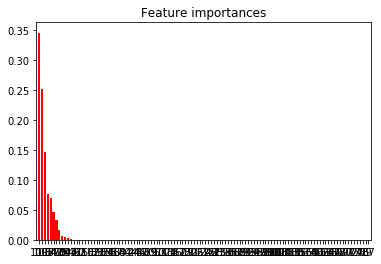

In [86]:
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()